# Carbonate Species versus pH

In [7]:
% setup environment
% clear data and number format
clear; format short e
% set path to equilibrium solver
txt=pwd; n=length(txt); rootpath=txt;
n=strfind(rootpath,"USERS"); rootpath=txt(1:n-2);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 

In [8]:
% database 
database=['phreeqc.dat'];

In [9]:
% Define PHREEQC database
database = 'phreeqc.dat';
% Define initial conditions for pH and pe
pH = 7;  
pe = 20.75 - pH;  

% Set total Carbon
C_total = 1e-3; 

% Define minerals to consider
minerals = [{'CO2(g)'}]; 
totalvector=[];
totalnames=[];

% Define pH range
pHrange = 2:0.1:14; 

% Define total concentrations of species
totalnames = [{'H+'}; {'Alkalinity'};]; % Corrected species names

% Set temperature 
T = 25;  
show=0; % this should show the PHREEQC output to the screen. works in Matlab but not Octave

% Define species to track
speciesexport = [{'CO3-2'}; {'HCO3-'};{'H2CO3'}]; % pH-dependent species

% Acid addition (not used in this case)
acid = [];  

% pH variation setting (1 = fixed, 0 = free)
pHfixcheck = 0;  


In [10]:
totalvector = zeros(1, length(pHrange));

for i = 1:length(pHrange)
    pH = pHrange(i);  
    pe = 20.75 - pH; 
    C_total = 1e-3;
    totalvector = zeros(length(pHrange), 4);  
% Run PHREEQC simulation in MATLAB
    [solutionspeciesconcs, speciesnames, solidconcs, solidnames] = ...
    runPHREEQCv3(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid, pHrange(i));

% Extract species concentrations
    H2CO3(i)=solutionspeciesconcs(3);
    HCO3(i) = solutionspeciesconcs(2);
    CO3(i) = solutionspeciesconcs(1);
    %H = solutionspeciesconcs(1);
end

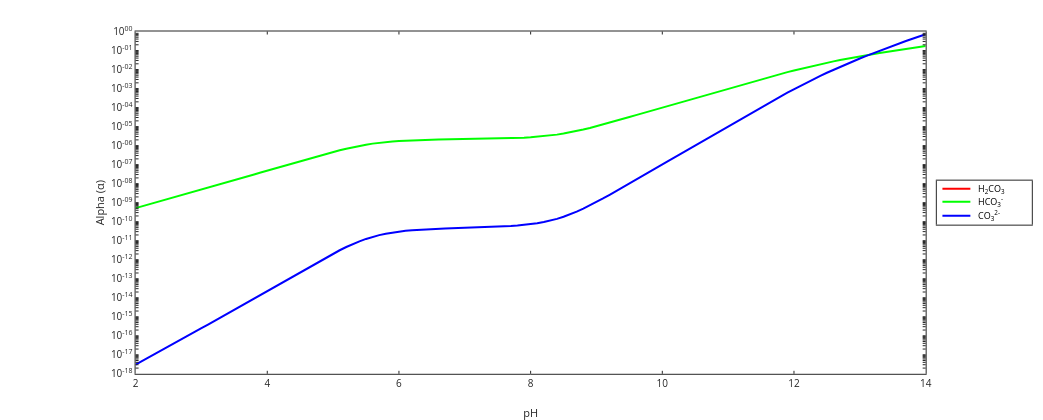

ERROR: received unknown message
Message type: usage_request
ERROR: received unknown message
Message type: usage_request


In [11]:
semilogy(pHrange, H2CO3, 'r', 'LineWidth', 2); hold on;
semilogy(pHrange, HCO3, 'g', 'LineWidth', 2);
semilogy(pHrange, CO3, 'b', 'LineWidth', 2);
xlabel('pH');
ylabel('Alpha (\alpha)');
legend('H{_2}CO{_3}', 'HCO{_3}^-', 'CO{_3}^{2-}', 'Location', 'EastOutside');
title('Carbonate Species Distribution as a Function of pH');